# HANDLING IMBALANCED DATA


---

## 🎯 **Oversampling**

📌 *Used to increase the number of instances in the **minority class** to balance the class distribution.*

### 🔹 Random Oversampling

🎲 Randomly duplicates existing minority class samples until both classes are balanced.

### 🔹 SMOTE (Synthetic Minority Over-sampling Technique)

🧠 Instead of just duplicating, **SMOTE** creates **synthetic examples** by *interpolating* between existing minority class samples.

> **💡 What is Interpolation?**
> It's a **mathematical method** to estimate values between two known points.
> 👉 Simply put, it’s used to **fill the gaps** in data.

---

## 🧹 **Undersampling**

📌 *Used to reduce the number of instances in the **majority class** to balance the class distribution.*

### 🔸 Random Undersampling

🧺 Randomly removes samples from the majority class until both classes are balanced.

### 🔸 Cluster Centroid

🔍 Uses **clustering algorithms** to find representative samples (centroids) from the majority class and replaces the bulk data with them.

---


In [4]:
# LOADING DATA:
from sklearn.datasets import make_classification
x,y= make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0,
                           random_state=1)

In [8]:
# TO IDENTIFY THE CLASSES ARE IMBALANCED OR NOT ?
from collections import Counter

class_counts = Counter(y)
print(class_counts)

Counter({0: 900, 1: 100})


In [10]:
class_counts.items()

dict_items([(0, 900), (1, 100)])

In [12]:
# CALCULATE CLASS RATIO:
class_ratio = {cls: count / len(y) for cls, count in class_counts.items()}
class_ratio

{0: 0.9, 1: 0.1}

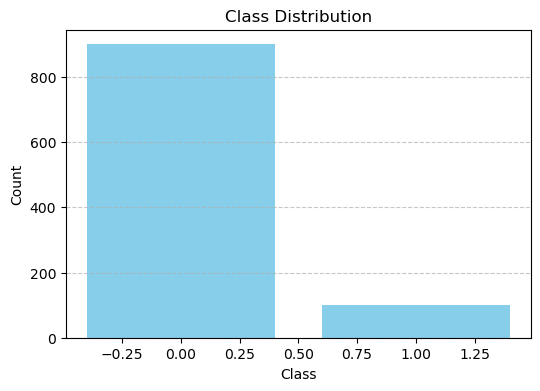

In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,4))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### ⚠️🎯 Class Imbalance Detection (Threshold = 0.7) 🎯⚠️
#### 🧪 Rule:
✅ Balanced → No class should have more than 70% of the total samples

❌ Imbalanced → If any class > 70%, it’s imbalanced

---
# 🐍 RANDOM OVERSAMPLING

In [16]:
! pip install imbalanced_learn

In [25]:
from imblearn.over_sampling import RandomOverSampler
ROS=RandomOverSampler()
X__RESAMPLE, Y__RESAMPLE = ROS.fit_resample(x,y)

import pandas as pd

RESAMPLED_DATA_ROS=pd.DataFrame(X__RESAMPLE,columns=["x1","x2"])
RESAMPLED_DATA_ROS["target_Y"]=Y__RESAMPLE
RESAMPLED_DATA_ROS

,x1,x2,target_Y
0,-0.122893,0.110470,0
1,0.336059,-1.332262,1
2,1.404399,1.416943,0
3,1.688211,1.124311,0
4,1.211533,1.009660,0
...,...,...,...
1795,1.263546,-1.240741,1
1796,1.488163,-2.007178,1
1797,-0.026487,0.205879,1
1798,0.234824,0.153098,1


In [26]:
RESAMPLED_DATA_ROS["target_Y"].value_counts()

target_Y
0    900
1    900
Name: count, dtype: int64

# 🏋🏻‍♀️ SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
SMT=SMOTE()
X__RESAMPLE, Y__RESAMPLE = SMT.fit_resample(x,y)
RESAMPLED_DATA_SMOTE=pd.DataFrame(X__RESAMPLE,columns=["col1","col2"])
RESAMPLED_DATA_SMOTE["TARGET_Y"]=Y__RESAMPLE
RESAMPLED_DATA_SMOTE

,col1,col2,TARGET_Y
0,-0.122893,0.110470,0
1,0.336059,-1.332262,1
2,1.404399,1.416943,0
3,1.688211,1.124311,0
4,1.211533,1.009660,0
...,...,...,...
1795,0.450576,-0.307399,1
1796,1.109518,-1.931969,1
1797,1.125405,-0.902808,1
1798,-0.232447,0.161793,1


In [36]:
RESAMPLED_DATA_SMOTE["TARGET_Y"].value_counts()

TARGET_Y
0    900
1    900
Name: count, dtype: int64

---
# 🐍 RANDOM UNDERSAMPLING

In [43]:
from imblearn.under_sampling import RandomUnderSampler
RUS=RandomUnderSampler()
X__RESAMPLE, Y__RESAMPLE = RUS.fit_resample(x,y)
RESAMPLED_DATA_RUS=pd.DataFrame(X__RESAMPLE, columns=["COL1","COL2"])
RESAMPLED_DATA_RUS["TARGET_Y"] = Y__RESAMPLE

In [44]:
RESAMPLED_DATA_RUS

,COL1,COL2,TARGET_Y
0,0.242312,0.238576,0
1,0.417138,0.381302,0
2,0.535878,1.083439,0
3,0.925810,1.209736,0
4,-0.835356,-0.170030,0
...,...,...,...
195,1.115618,-0.929017,1
196,0.554239,-1.631069,1
197,0.518156,-0.365740,1
198,0.195086,-0.210446,1


In [45]:
RESAMPLED_DATA_RUS["TARGET_Y"].value_counts()

TARGET_Y
0    100
1    100
Name: count, dtype: int64

# ⭕ CLUSTER CENTROID METHOD